In [1]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pi = np.pi

In [119]:
# データの読み込み
df_f = pd.read_table('f_bias.csv', sep=',', engine='python', names=('V', 'A', 'InR', 'expo'), skiprows=1)
df_b = pd.read_table('b_bias.csv', sep=',', engine='python', names=('V', 'A', 'InR', 'expo'), skiprows=1)
df_fet = pd.read_table('FET.csv', sep=',', engine='python', names=('VGS','V', 'A', 'InR', 'expo'), skiprows=1)
# 冪乗を行うために型変換
df_f['expo'] = df_f['expo'].astype(np.float64)
df_b['expo'] = df_b['expo'].astype(np.float64)
# 単位の調節
df_f['A'] = df_f['A']*10**df_f['expo']
df_b['A'] = df_b['A']*10**df_b['expo']

In [120]:
# 内部抵抗を考慮した補正データの導出
# 電圧は測った値をそのまま使えるが、電流は変わるのでそれを計算する
df_f['Ads'] = df_f['A']-(df_f['V']/df_f['InR'])
df_b['Ads'] = df_b['A']-(df_b['V']/df_b['InR'])
# 横軸Adsを基準に昇順に並び替える
df_f.sort_values('V', inplace=True)
df_b.sort_values('V', inplace=True)

In [121]:
# df_bという逆バイアスは負電圧、負電流であるのでどちらもマイナスにする
df_b['V'] = -df_b['V']
df_b['A'] = -df_b['A']
df_b['Ads'] = -df_b['Ads']

Text(0, 0.5, 'I [A]')

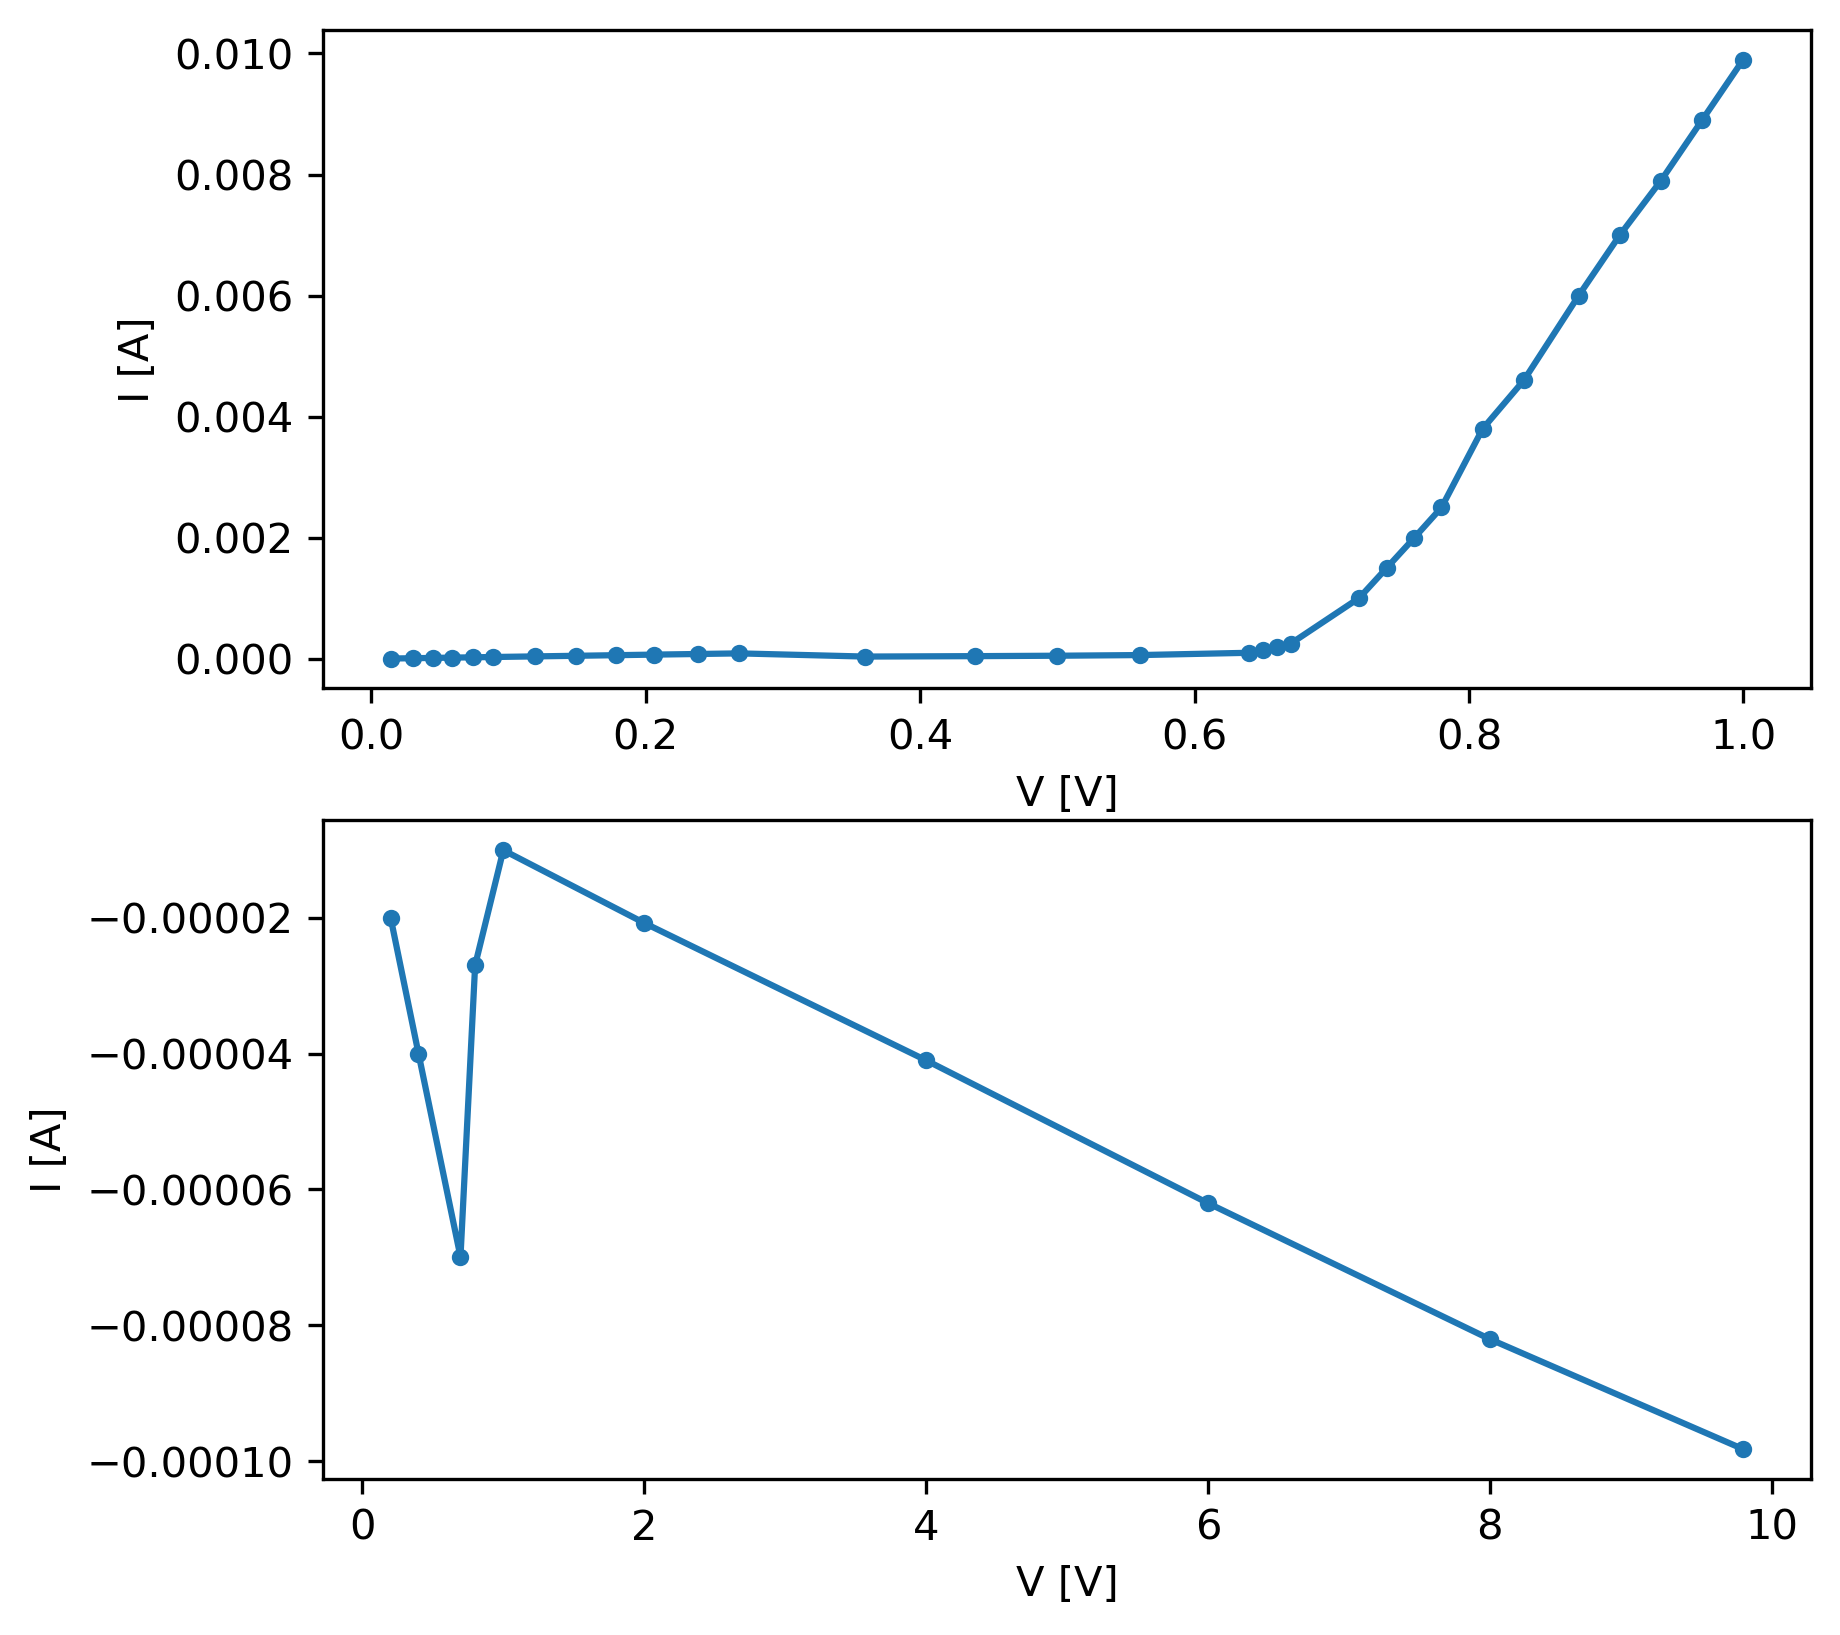

In [122]:
fig = plt.figure(figsize=(6.4, 6.4), dpi=300)
fig.patch.set_facecolor('white')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(df_f['V'], df_f['A'], s=10)
ax1.plot(df_f['V'], df_f['A'])
ax1.set_xlabel('V [V]')
ax1.set_ylabel('I [A]')

ax2.scatter(-df_b['V'], df_b['A'], s=10)
ax2.plot(-df_b['V'], df_b['A'])
ax2.set_xlabel('V [V]')
ax2.set_ylabel('I [A]')
ax2.

## ここからが割とちゃんとしたグラフたち

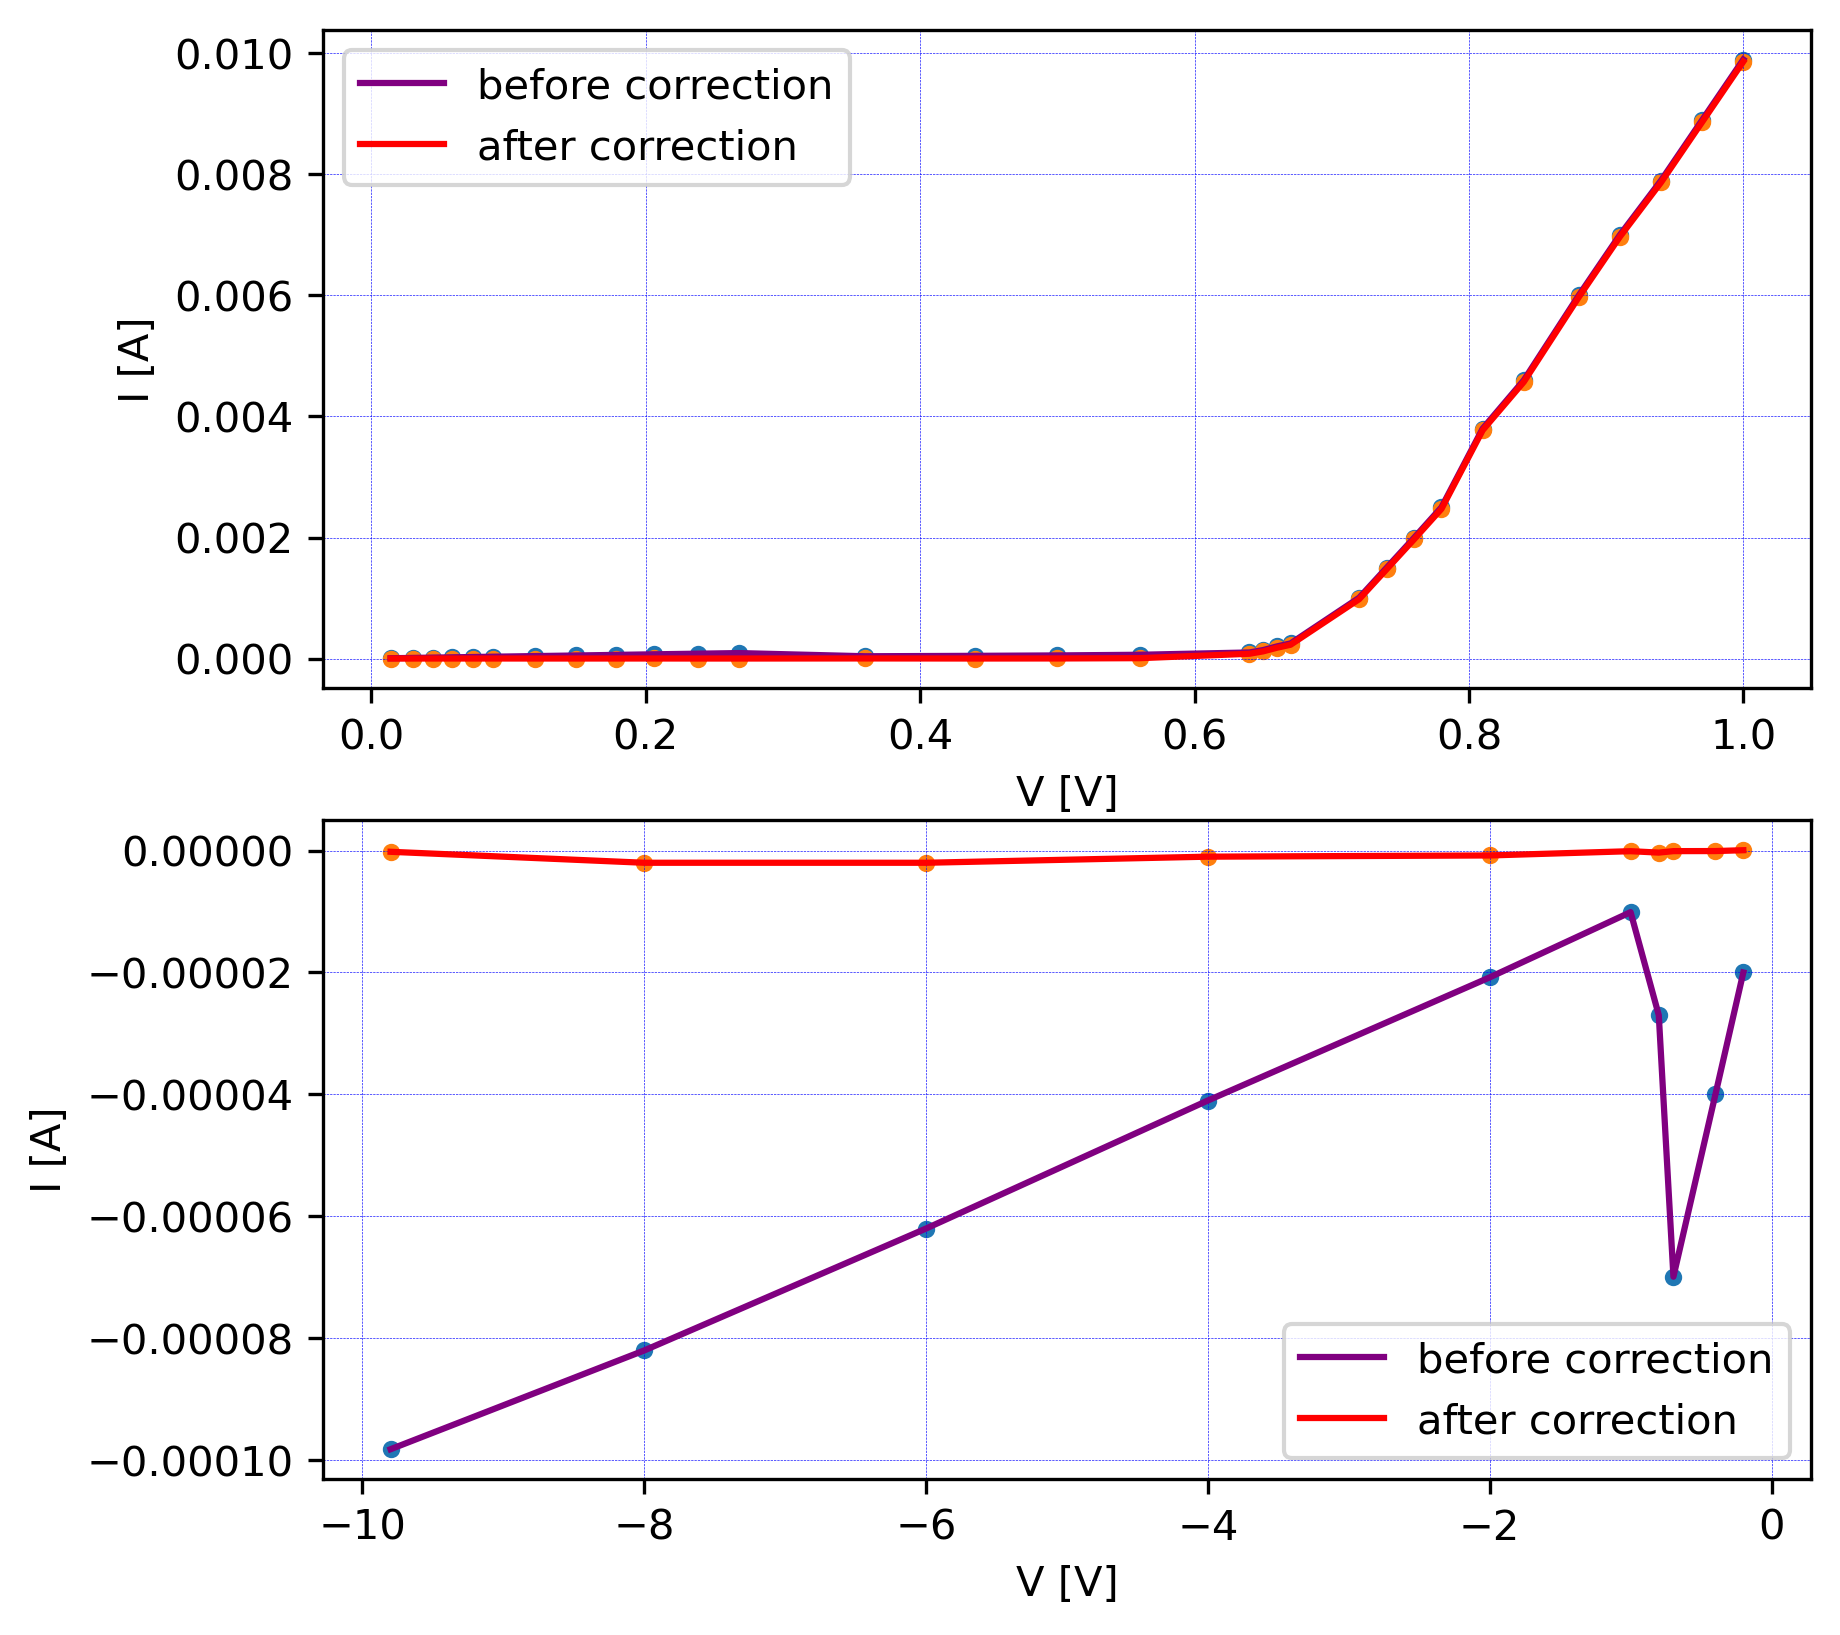

In [262]:
fig1 = plt.figure(figsize=(6.4, 6.4), dpi=300)
fig1.patch.set_facecolor('white')
ax11 = fig1.add_subplot(211)
ax21 = fig1.add_subplot(212)

ax11.scatter(df_f['V'], df_f['A'], s=10)
ax11.scatter(df_f['V'], df_f['Ads'], s=10)
ax11.plot(df_f['V'], df_f['A'], color='purple', linewidth=1.5, label='before correction')
ax11.plot(df_f['V'], df_f['Ads'], color='red', linewidth=1.5, label='after correction')
ax11.set_xlabel('V [V]')
ax11.set_ylabel('I [A]')
ax11.grid(which='both', axis='both', color='blue', alpha=1.0, linestyle='--', linewidth=0.15)
ax11.legend()

ax21.scatter(df_b['V'], df_b['A'], s=10)
ax21.scatter(df_b['V'], df_b['Ads'], s=10)
ax21.plot(df_b['V'], df_b['A'], color='purple', linewidth=1.5, label='before correction')
ax21.plot(df_b['V'], df_b['Ads'], color='red', linewidth=1.5, label='after correction')
ax21.set_xlabel('V [V]')
ax21.set_ylabel('I [A]')
ax21.grid(which='both', axis='both', color='blue', alpha=1.0, linestyle='--', linewidth=0.15)
ax21.legend()

In [264]:
df_new = np.vstack([df_b, df_f])

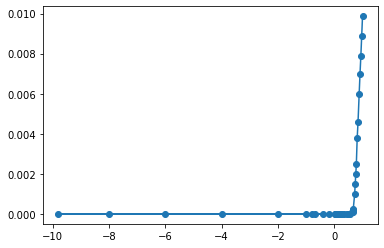

In [265]:
plt.scatter(df_new[:, 0], df_new[:, 4])
plt.plot(df_new[:, 0], df_new[:,4])

In [285]:
# 理論曲線を引いてみる
# そのための準備
V_ide= [v*0.01 for v in range(-1000, 24)]
q0 = 1.602*10**(-9)
# k= 8.62x10**(-5)eV/K
kT0=8.62*10**(-5)*q0*293 # 20°を仮定
I0 =10**(-6)
I_ide= [I0*(np.exp(q0*v/kT0)-1) for v in V_ide]

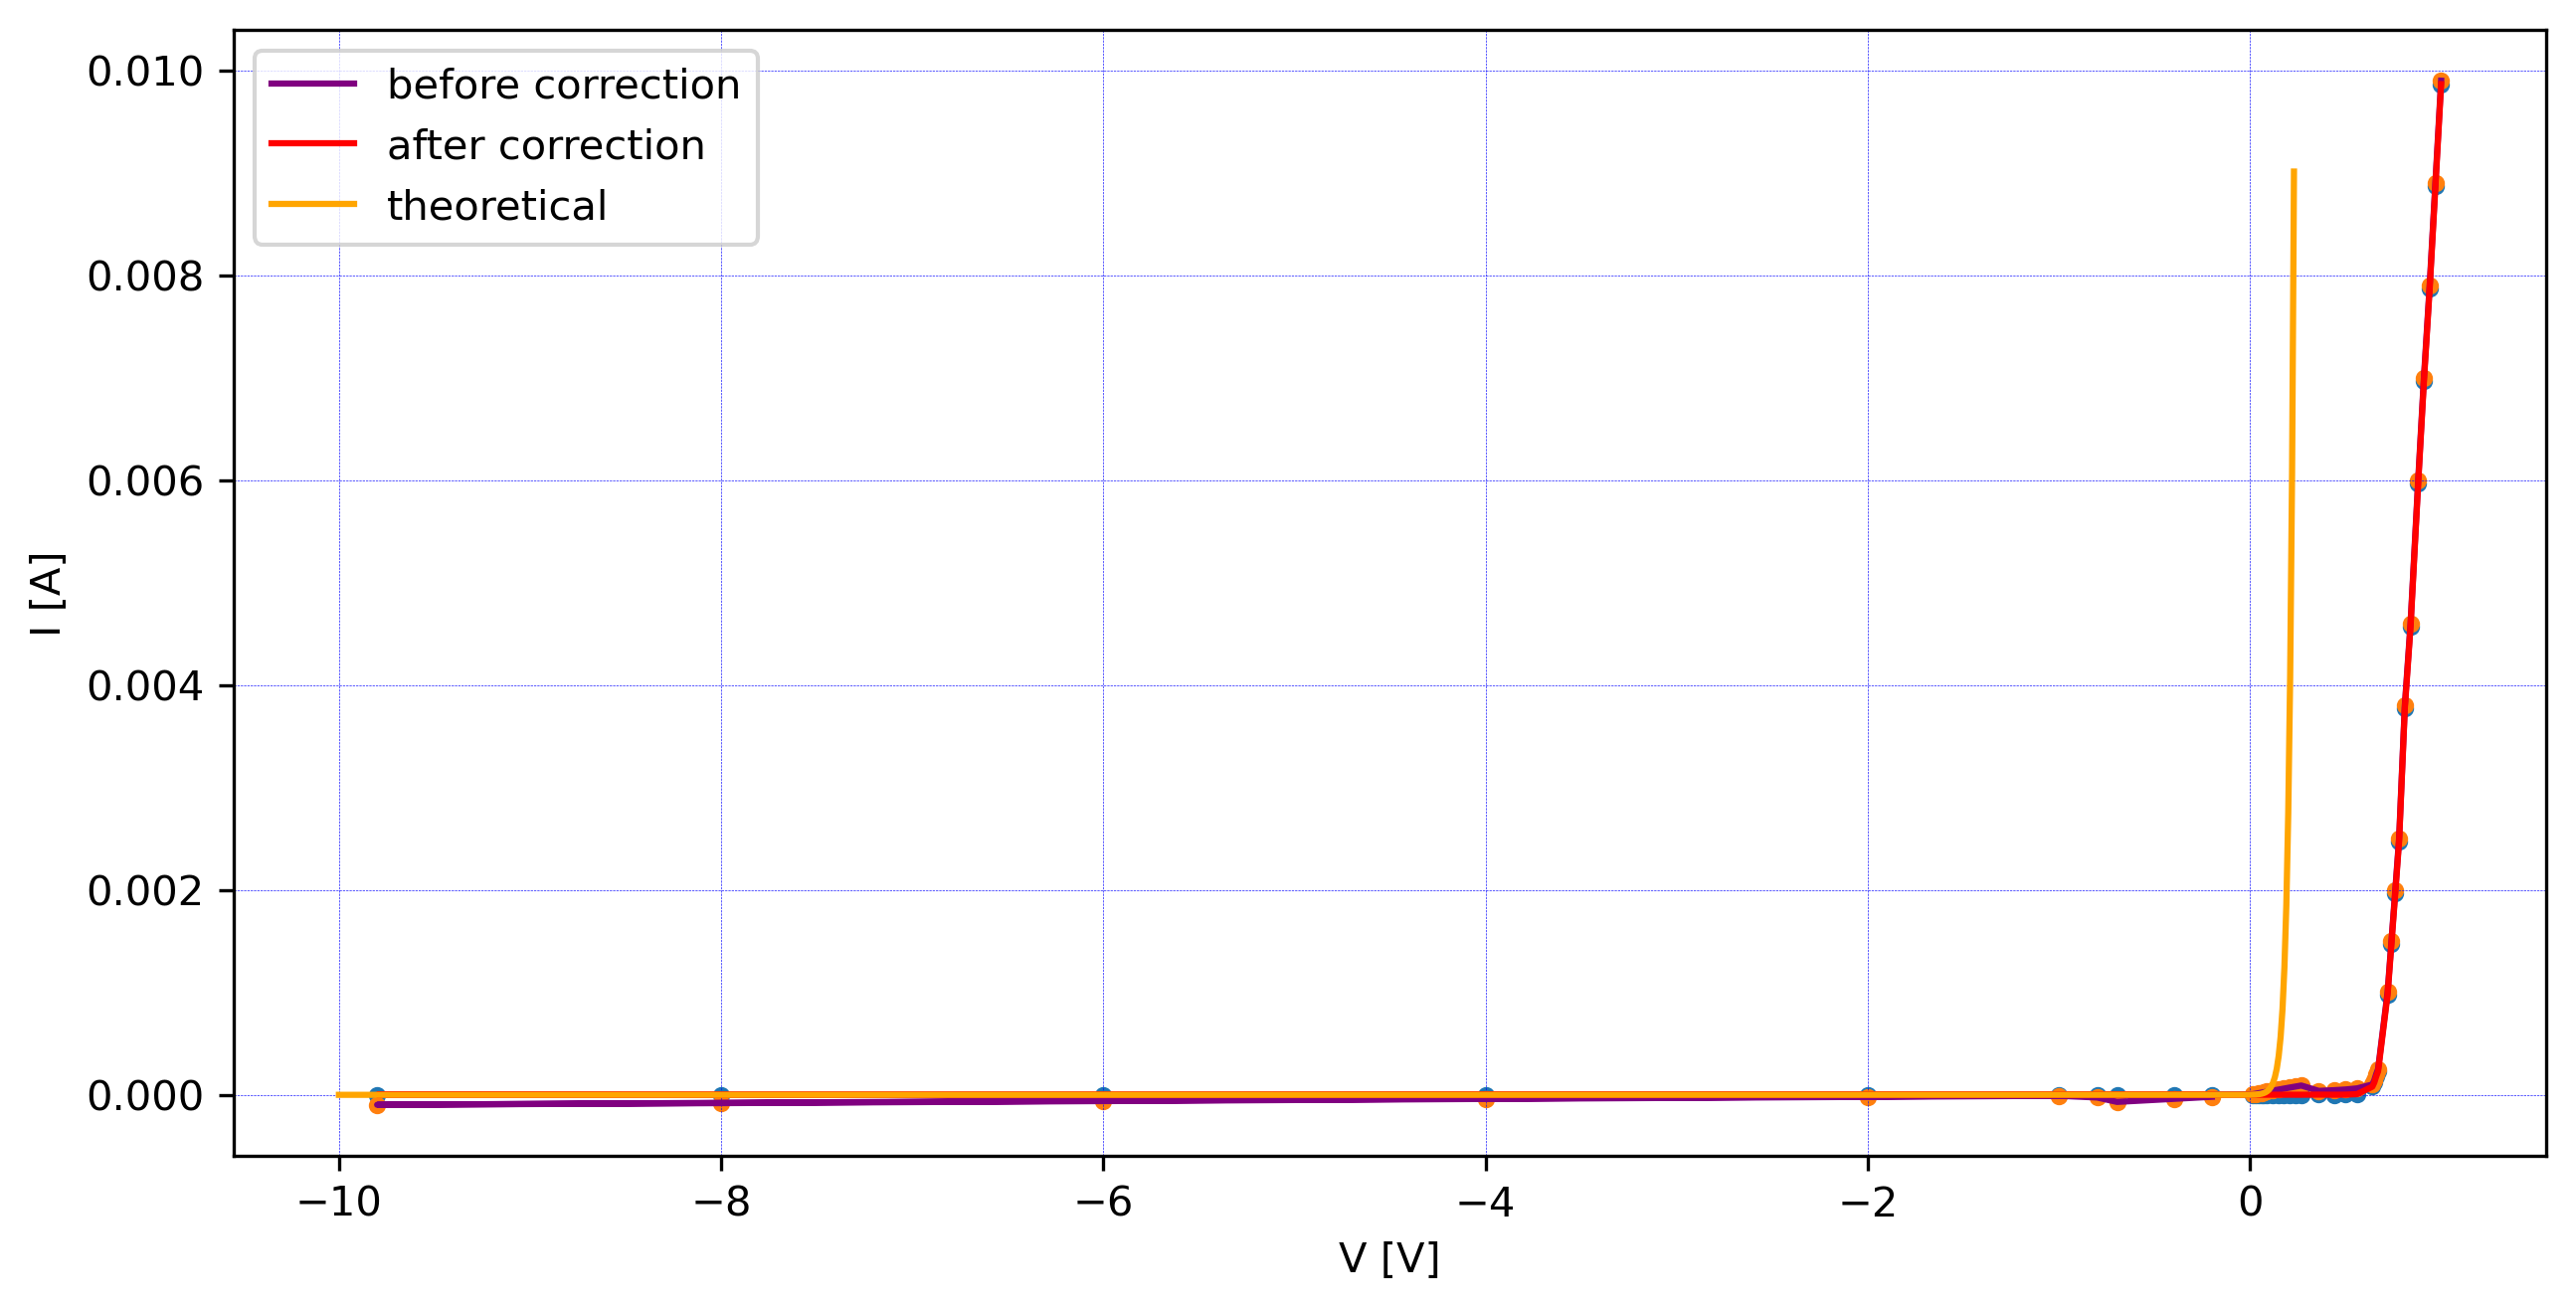

In [286]:
fig2 = plt.figure(figsize=(10, 5.0), dpi=300) # 一つであれ二つであれ、確保する部分
fig2.patch.set_facecolor('white')
ax3 = fig2.add_subplot(111)
# ax4 = fig2.add_subplot(212)
ax3.scatter(df_new[:, 0], df_new[:, 4], s=10)
ax3.scatter(df_new[:, 0], df_new[:, 1], s=10)
ax3.plot(df_new[:, 0], df_new[:, 1], color='purple', linewidth=1.5, label='before correction')
ax3.plot(df_new[:, 0], df_new[:, 4], color='red', linewidth=1.5, label='after correction')
ax3.plot(V_ide, I_ide, color='orange', linewidth=1.5, label='theoretical')

ax3.set_xlabel('V [V]')
ax3.set_ylabel('I [A]')
# ax3.set_xlim([-1, 2]) # ここでグラフの横軸を調節できる
ax3.grid(which='both', axis='both', color='blue', alpha=1.0, linestyle='--', linewidth=0.15)
ax3.legend()

Text(0, 0.5, 'I [A]')

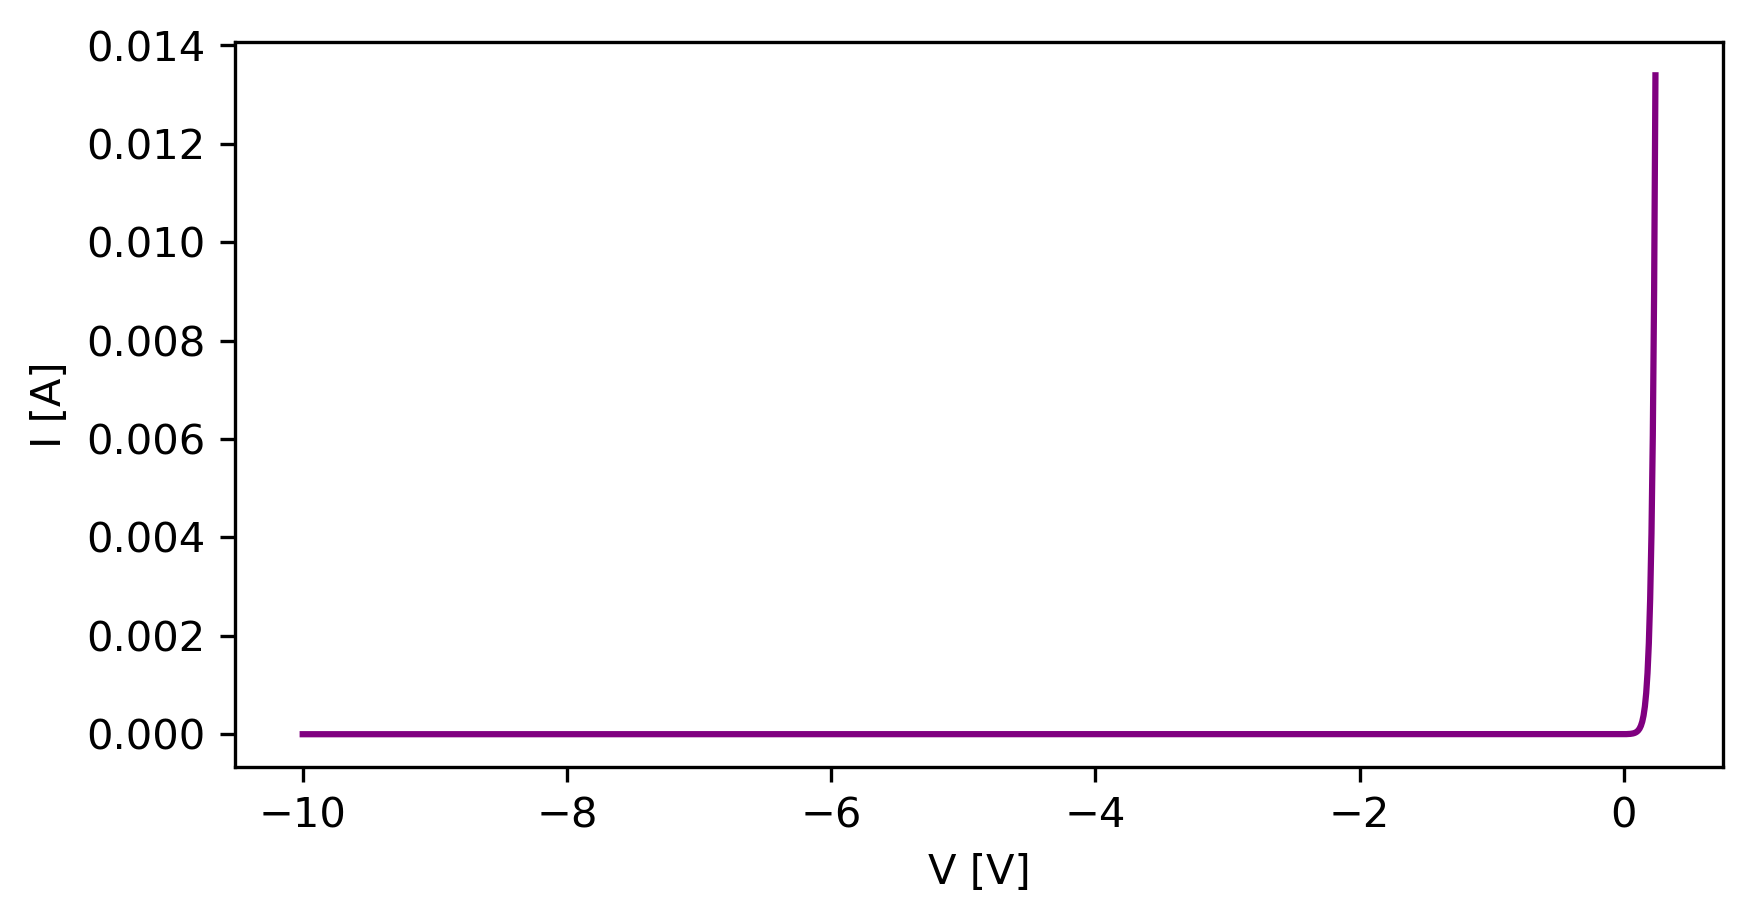

In [278]:
fig4 = plt.figure(figsize=(6.4, 3.2), dpi=300)
fig4.patch.set_facecolor('white')
ax31 = fig4.add_subplot(111)

ax31.plot(V_ide, I_ide, color='purple', linewidth=1.5, label='ideal')
# ax31.set_xlim([-10, 10])
# ax31.set_ylim([-0.1, 10])
ax31.set_xlabel('V [V]')
ax31.set_ylabel('I [A]')
